# Smart Aliens:
## Using Statistical Interference to Find Exoplanets that Could Harbor Intelligent Beings
---

### by Julian Estrada & William Walker

- 
 

In [1]:
#### IMPORT Everything here ####
import ast
import bs4
import flask
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import requests
import scipy
import scipy.stats as st
import sqlalchemy




from bs4 import BeautifulSoup

from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float

#from selenium import webdriver
#from splinter import Browser

# Part I: Using Flask

In [21]:
## API Flask ##

## Import via loading in csv file until API works

 

In [2]:
## Read in csv file ##
exoplanet_metadata_path = "data/exoplanet-archive.csv"
exoplanet_metadata = pd.read_csv(exoplanet_metadata_path)


/var/folders/hf/mp5v5rls3hg252gfcnygxxpw0000gn/T/ipykernel_14758/3010382786.py:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  exoplanet_metadata = pd.read_csv(exoplanet_metadata_path)


# Part II: Cleaning the Data

In [3]:
## Create exoplanet dataframe with columns we want ##
exoplanet_df = exoplanet_metadata[[
    "pl_name", "hostname", "disc_year", "discoverymethod", "pl_orbper", "pl_orbsmax",\
          "pl_rade", "pl_masse", "pl_bmasse", "pl_insol", "pl_eqt", "st_spectype", "st_teff",\
              "glat", "glon", "sy_dist"
]]


In [4]:
## Math Constants ##
e = np.e
pi = np.pi


## Math Operations ##
arccos = np.arccos
arcsin = np.arcsin
cos = np.cos
ln = np.log
sin = np.sin
sqrt = np.sqrt

In [5]:

## Convert distance to Light-Years ##
lightyear = ((2 ** 2) * 3 * (5 ** 3) * 877 * 7789 ) / (pi * 7 * 487 * 293339)
exoplanet_df["sy_dist"] *= lightyear

## Experimental average gravity of Earth in m/s^2 ##
g_earth = 9.8203

## Insert Gravity columns ##
exoplanet_df["pl_gravitye"] = exoplanet_df["pl_masse"] / (exoplanet_df["pl_rade"] ** 2)
exoplanet_df["pl_gravity"] = round(g_earth * exoplanet_df["pl_gravitye"], 4)

## X and Y value coordinates in Light-Years ##
exoplanet_df["xVal"] = exoplanet_df["sy_dist"] * -sin( exoplanet_df["glon"] * pi / 180 )\
      * cos( exoplanet_df["glat"] * pi / 180 )
exoplanet_df["yVal"] = exoplanet_df["sy_dist"] * cos( exoplanet_df["glon"] * pi / 180 )\
      * cos( exoplanet_df["glat"] * pi / 180 )



/var/folders/hf/mp5v5rls3hg252gfcnygxxpw0000gn/T/ipykernel_14758/767550919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exoplanet_df["sy_dist"] *= lightyear
/var/folders/hf/mp5v5rls3hg252gfcnygxxpw0000gn/T/ipykernel_14758/767550919.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exoplanet_df["pl_gravitye"] = exoplanet_df["pl_masse"] / (exoplanet_df["pl_rade"] ** 2)
/var/folders/hf/mp5v5rls3hg252gfcnygxxpw0000gn/T/ipykernel_14758/767550919.py:10: SettingWithCopyWarning: 
A value is trying to be se

In [6]:
## Reorder Columns ##
exoplanet_df = exoplanet_df[[
    "pl_name", "hostname", "disc_year", "discoverymethod", "pl_orbper", "pl_orbsmax",\
          "pl_rade", "pl_masse", "pl_gravitye", "pl_gravity", "pl_insol", "pl_eqt",\
              "st_spectype", "st_teff", "glat", "glon", "sy_dist", "xVal", "yVal"
]]

## Drop all rows with Null values ##
exoplanet_df = exoplanet_df.dropna()

## Drop all rows with repeated planets ##
exoplanet_df = exoplanet_df.drop_duplicates(subset=["pl_name"], keep= False)

## How many Planets do we have? ##
print( f"How many unique Exoplanets have Full Data? It's { len( exoplanet_df['pl_name'].unique() ) }!" )



exoplanet_df.head(25)


How many unique Exoplanets have Full Data? It's 162!


,pl_name,hostname,disc_year,discoverymethod,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_gravitye,pl_gravity,pl_insol,pl_eqt,st_spectype,st_teff,glat,glon,sy_dist,xVal,yVal
343,CoRoTID 223977153 b,CoRoTID 223977153,2017,Transit,6.718370,0.07100,6.389,47.67450,1.167940,11.4695,132.26,938.0,G0 VI,5970.0,1.86373,203.48237,1880.888384,749.075238,-1724.205756
472,EPIC 246851721 b,EPIC 246851721,2018,Transit,6.180235,0.07229,11.781,953.49000,6.869922,67.4647,642.00,1401.0,F5 V,6202.0,-12.64088,186.97531,1215.363033,144.018068,-1177.126315
474,EPIC 249893012 b,EPIC 249893012,2020,Transit,3.595100,0.04700,1.950,8.75000,2.301118,22.5977,1037.00,1616.0,G8 IV/V,5430.0,34.30816,345.11043,1047.927395,222.423647,836.542327
475,EPIC 249893012 c,EPIC 249893012,2020,Transit,15.624000,0.13000,3.670,14.67000,1.089176,10.6960,160.00,990.0,G8 IV/V,5430.0,34.30816,345.11043,1047.927395,222.423647,836.542327
476,EPIC 249893012 d,EPIC 249893012,2020,Transit,35.747000,0.22000,3.940,10.18000,0.655776,6.4399,53.00,752.0,G8 IV/V,5430.0,34.30816,345.11043,1047.927395,222.423647,836.542327
481,G 9-40 b,G 9-40,2019,Transit,5.746007,0.03850,2.025,11.70000,2.853224,28.0195,7.20,456.0,M2.5 V,3348.0,37.03563,206.06509,91.087649,31.948946,-65.316615
506,GJ 1214 b,GJ 1214,2009,Transit,1.580404,0.01490,2.742,8.17000,1.086644,10.6712,21.00,596.0,M4 V,3250.0,23.60704,26.16217,47.758100,-19.294982,39.278025
600,GJ 357 b,GJ 357,2019,Transit,3.930720,0.03500,1.217,1.84000,1.242329,12.2000,12.60,525.0,M2.5 V,3505.0,22.08045,253.88843,30.795065,27.415639,-7.919115
604,GJ 367 b,GJ 367,2021,Transit,0.321923,0.00709,0.699,0.63300,1.295536,12.7225,579.00,1365.0,M1.0 V,3522.0,5.65890,272.24323,30.699893,30.526867,1.195791
612,GJ 3929 b,GJ 3929,2022,Transit,2.616274,0.02569,1.150,1.21000,0.914934,8.9849,17.50,569.0,M3.5 V,3369.0,49.59735,56.66419,51.563693,-27.922271,18.366496


In [51]:
## Name of File: ##
file_name = 'exoplanet_df'
## Upload Dataframe to csv file ##
exoplanet_df.to_csv(f"data/{file_name}.csv", sep=',', encoding='utf-8')

In [7]:
## Getting Vals into Lists for js ##
xValList = list(exoplanet_df["xVal"])
yValList = list(exoplanet_df["yVal"])

planetNameList = list(exoplanet_df["pl_name"])

for i in range(0, len(xValList)):
    xValList[i] = round(xValList[i], 3)

for j in range(0, len(yValList)):
    yValList[j] = round(yValList[j], 3)


print(xValList)
print(yValList)
print(planetNameList)

[749.075, 144.018, 222.424, 222.424, 222.424, 31.949, -19.295, 27.416, 30.527, -27.922, 6.817, -1456.25, 177.781, 1062.842, 1698.211, -705.154, 282.406, -164.028, -164.028, -164.028, 45.089, -74.606, 89.584, 89.584, 89.584, 89.584, 89.584, 8.783, 8.783, -251.819, 131.566, 83.561, 83.561, 59.347, 59.347, 114.638, 65.867, 222.388, 337.922, -179.195, 91.23, 91.23, -4.035, -295.366, -295.366, -295.366, -295.366, 142.018, 81.621, 81.621, 81.621, 35.37, 103.275, -603.736, 480.648, -404.56, -1455.401, -289.727, 173.811, -654.391, -365.414, -1682.303, -1225.19, 32.316, 32.316, 32.316, -9.141, 67.03, 67.03, 54.672, 54.672, 533.205, 1251.673, 1651.779, 1418.568, 2210.713, 2977.65, -631.762, 1735.008, -2027.901, -907.961, -988.008, 189.497, 81.369, 757.785, 15.193, 87.923, -60.834, -437.226, -437.226, -437.226, -437.226, 209.06, 209.06, 209.06, -101.946, -101.946, 32.613, -72.552, -481.746, -88.105, -144.261, -144.261, 920.298, -42.957, 843.541, -117.831, -80.451, -126.083, 193.49, -9.537, -403.5

In [8]:
## vals of temp and insolence ##
insolValList = list(exoplanet_df["pl_insol"])
tempValList = list(exoplanet_df["pl_eqt"])

for k in range(0, len(insolValList)):
    insolValList[k] *= 1361

print(insolValList)
print(tempValList)

[180005.86, 873762.0, 1411357.0, 217760.0, 72133.0, 9799.2, 28581.0, 17148.6, 788019.0, 23817.5, 54848.299999999996, 6328650.0, 251512.80000000002, 98944.7, 4069390.0, 763521.0, 1001001.89, 136100.0, 28581.0, 19462.3, 99216.90000000001, 36066.5, 21776.0, 10833.56, 159237.0, 63558.700000000004, 35794.3, 57434.200000000004, 21912.100000000002, 133500.49, 179652.0, 58931.299999999996, 13882.199999999999, 3944178.0, 740111.7999999999, 10098.62, 899621.0, 2606315.0, 91187.0, 337528.0, 81660.0, 32664.0, 13487.51, 318895.91, 68526.35, 33494.21, 14290.5, 91187.0, 14290.5, 4314.37, 1959.84, 6560.02, 816600.0, 4289872.0, 3184740.0, 5937362.5, 4014950.0, 1348995.98, 2504240.0, 61108900.0, 992169.0, 408.3, 1197.68, 33616.7, 17420.8, 6818.61, 626.0600000000001, 3593.04, 7934.63, 5566.49, 1238.51, 88873.3, 566176.0, 578425.0, 653280.0, 1578760.0, 1150045.0, 684583.0, 992169.0, 1810130.0, 835654.0, 910509.0, 315752.0, 693021.2, 724052.0, 55256.6, 2626.73, 82068.3, 266756.0, 175569.0, 38108.0, 14971.0

In [9]:
## vals of radii and masses ##
radiiValList = list(exoplanet_df["pl_rade"])
massValList = list(exoplanet_df["pl_masse"])

print(radiiValList)
print(massValList)



[6.389, 11.781, 1.95, 3.67, 3.94, 2.025, 2.742, 1.217, 0.699, 1.15, 1.305, 16.477, 12.016, 8.709, 14.986, 13.843, 2.05, 3.41, 3.195, 2.995, 2.25, 2.501, 2.0, 1.87, 0.75, 0.818, 1.137, 1.24, 1.533, 9.718, 2.45, 2.79, 2.39, 1.35, 3.228, 3.89, 22.754, 3.88, 2.242, 1.75, 5.68, 7.82, 3.44, 2.59, 3.53, 2.48, 1.95, 2.63, 2.078, 1.582, 1.458, 1.015, 15.681, 17.598, 21.409, 19.515, 17.777, 14.83, 19.044, 21.196, 11.545, 9.18, 3.87, 0.85, 1.385, 1.521, 1.43, 2.438, 1.032, 1.32, 1.367, 14.908, 11.747, 12.33, 14.572, 13.899, 13.563, 12.218, 11.994, 12.285, 12.722, 12.408, 2.265, 1.791, 14.572, 2.415, 3.65, 1.694, 3.01, 2.51, 3.51, 3.78, 2.726, 2.759, 2.93, 2.34, 2.82, 3.42, 1.62, 16.701, 1.672, 2.18, 2.47, 14.415, 1.79, 12.173, 1.9, 5.05, 3.14, 16.141, 6.956, 12.89, 1.25, 1.33, 2.19, 11.321, 3.51, 1.52, 18.103, 2.77, 8.295, 11.321, 12.0, 5.14, 6.0, 7.9, 3.02, 5.93, 6.18, 12.285, 13.675, 2.68, 5.09, 11.68, 1.166, 11.6, 11.9, 11.31, 1.425, 2.91, 2.82, 2.55, 18.977, 9.236, 5.25, 1.992, 1.85, 2.02, 2.

# Part III: Further manipulation

In [19]:
#### Get most Earth-Like planets ####
planetNameList = []
earthRankList = []

earthRade = 1
earthMass = 1
earthEQT = 255


for i in range(0, len(exoplanet_df["pl_name"])):
    planetNameList.append(list(exoplanet_df["pl_name"])[i])

    ## radii arg ##
    radARG = float(list(exoplanet_df["pl_rade"])[i]) - earthRade

    ## mass arg ##
    massARG = float(list(exoplanet_df["pl_masse"])[i]) - earthMass

    ## temp arg ##
    tempARG =  ( float(list(exoplanet_df["pl_eqt"])[i]) - earthEQT) / earthEQT


    ## Average specs out ##
    earthRank = round(100 * np.e ** (-sqrt( radARG ** 2 + massARG ** 2 + tempARG ** 2 )), 3)
    earthRankList.append(earthRank)

earthRankList

earthLike_df = pd.DataFrame({
    "pl_name": planetNameList,
    "earth-like_score": earthRankList
})


#earthLike_df = earthLike_df.sort_values("earth-like_score", ascending = False)

earthLike_df.head(20)



,pl_name,earth-like_score
0,CoRoTID 223977153 b,0.000
1,EPIC 246851721 b,0.000
2,EPIC 249893012 b,0.008
3,EPIC 249893012 c,0.000
4,EPIC 249893012 d,0.005
5,G 9-40 b,0.002
6,GJ 1214 b,0.055
7,GJ 357 b,25.440
8,GJ 367 b,1.254
9,GJ 3929 b,28.419


In [20]:
test = list(earthLike_df["earth-like_score"])

for i in range(0, len(test)):
    test[i] = round( test[i], 3)

print(test)



[0.0, 0.0, 0.008, 0.0, 0.005, 0.002, 0.055, 25.44, 1.254, 28.419, 7.867, 0.0, 0.0, 0.0, 0.0, 0.0, 0.324, 0.007, 0.058, 5.447, 0.374, 0.0, 0.057, 6.763, 7.31, 15.483, 22.43, 11.911, 8.538, 0.0, 0.058, 0.007, 0.014, 0.006, 0.0, 0.0, 0.0, 0.0, 0.002, 0.042, 0.0, 0.0, 0.0, 0.008, 0.0, 0.282, 0.006, 0.0, 1.281, 15.942, 27.272, 0.146, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.505, 17.68, 28.752, 0.346, 0.189, 56.96, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.005, 0.0, 0.321, 0.0, 0.474, 0.038, 0.025, 0.583, 0.0, 0.01, 0.181, 0.0, 0.031, 0.002, 0.0, 0.381, 0.0, 2.047, 0.123, 0.162, 0.0, 0.844, 0.0, 0.333, 0.0, 0.004, 0.0, 0.0, 0.0, 4.368, 0.164, 0.398, 0.0, 0.0, 14.509, 0.0, 0.031, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.091, 0.0, 0.0, 0.47, 0.0, 0.0, 0.0, 0.029, 0.528, 0.0, 0.001, 0.0, 0.0, 0.0, 0.316, 3.765, 1.152, 0.0, 1.31, 0.014, 0.0, 0.016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.478]


In [21]:

planetNameyList = []
alienRankList = []

alien_rad = 0.8
## Rocky Planet Mass and Radius are correlated by a Lambert W Function ##
## mass * (33.0120 ** (mass ** -0.0352215) ) = (33.9270 * radius ** 3) ##
## (close to m = 0.9757 * r ** 3) ##
alien_mass = 0.4802


alienTemp = 240


for j in range(0, len(exoplanet_df["pl_name"])):
    planetNameyList.append(list(exoplanet_df["pl_name"])[j])

    ## radii arg ##
    radARG = float(list(exoplanet_df["pl_rade"])[j]) - alien_rad

    ## mass arg ##
    massARG = float(list(exoplanet_df["pl_masse"])[j]) - alien_mass

    ## temp arg ##
    tempARG =  ( float(list(exoplanet_df["pl_eqt"])[j]) - alienTemp) / alienTemp


    ## Average specs out ##
    lifeRank = round(100 * e ** (-sqrt( (radARG ** 2) + (massARG ** 2) + (tempARG ** 2) )), 3)
    alienRankList.append(lifeRank)

alienRankList

lifeLike_df = pd.DataFrame({
    "pl_name": planetNameyList,
    "life-friendly_score": alienRankList
})


#earthLike_df = earthLike_df.sort_values("earth-like_score", ascending = False)

lifeLike_df



,pl_name,life-friendly_score
0,CoRoTID 223977153 b,0.000
1,EPIC 246851721 b,0.000
2,EPIC 249893012 b,0.004
3,EPIC 249893012 c,0.000
4,EPIC 249893012 d,0.003
...,...,...
157,WASP-173 A b,0.000
158,WASP-193 b,0.000
159,WASP-44 b,0.000
160,XO-7 b,0.000


In [15]:
lifeLike_df["life-friendly_score"].max()

33.585

In [42]:
lifeLike_df.loc[ lifeLike_df["life-friendly_score"] == lifeLike_df["life-friendly_score"].max(), :]

,pl_name,life-friendly_score
68,LP 791-18 d,44.583


In [43]:
exoplanet_df.loc[ exoplanet_df["pl_name"] == "LP 791-18 d", : ]

,pl_name,hostname,disc_year,discoverymethod,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_gravitye,pl_gravity,pl_insol,pl_eqt,st_spectype,st_teff,glat,glon,sy_dist,xVal,yVal
32310,LP 791-18 d,LP 791-18,2023,Transit,2.753436,0.01992,1.032,0.9,0.845051,8.2987,5.83,396.0,M(6.1 +/- 0.7) V,2960.0,39.10605,268.56582,86.407631,67.029572,-1.678179


In [16]:
test = list(lifeLike_df["life-friendly_score"])

print(test)



[0.0, 0.0, 0.002, 0.0, 0.003, 0.001, 0.028, 11.538, 0.294, 13.336, 3.128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.072, 0.003, 0.029, 2.684, 0.165, 0.0, 0.03, 3.362, 2.884, 7.236, 11.131, 4.642, 3.894, 0.0, 0.023, 0.004, 0.008, 0.001, 0.0, 0.0, 0.0, 0.0, 0.001, 0.015, 0.0, 0.0, 0.0, 0.003, 0.0, 0.137, 0.003, 0.0, 0.652, 8.307, 14.738, 0.082, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.8, 7.836, 14.174, 0.202, 0.106, 33.585, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.002, 0.0, 0.147, 0.0, 0.203, 0.015, 0.011, 0.286, 0.0, 0.004, 0.076, 0.0, 0.014, 0.001, 0.0, 0.069, 0.0, 1.143, 0.057, 0.09, 0.0, 0.301, 0.0, 0.153, 0.0, 0.002, 0.0, 0.0, 0.0, 2.421, 0.095, 0.218, 0.0, 0.0, 7.066, 0.0, 0.017, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.035, 0.0, 0.0, 0.078, 0.0, 0.0, 0.0, 0.002, 0.218, 0.0, 0.0, 0.0, 0.0, 0.0, 0.104, 1.842, 0.618, 0.0, 0.481, 0.007, 0.0, 0.007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.133]


In [17]:
100 * e ** ( -sqrt(0.2 ** 2 + 0.500224 ** 2 + (15/240) ** 2) )

58.13874888941479

In [18]:
100 * e ** (-sqrt(1.42 ** 2 + 4.3198 ** 2 + (930/240) ** 2))

0.2543188842544015

# Part IV: Put forth into javascript

 

In [23]:
starTypeList = list(exoplanet_df["st_spectype"])

for i in range(0, len(starTypeList)):
    print(starTypeList[i][0])

G
F
G
G
G
M
M
M
M
M
M
F
K
G
G
G
G
G
G
G
K
K
K
K
K
K
K
M
M
F
F
K
K
G
G
K
K
G
K
K
G
G
M
K
K
K
K
G
M
M
M
M
G
F
A
A
A
G
F
B
K
G
K
M
M
M
M
M
M
M
M
M
G
G
G
G
G
K
F
G
K
G
G
K
F
M
M
M
K
K
K
K
K
K
K
K
K
G
G
A
M
M
M
G
M
G
M
M
M
F
K
M
M
M
M
G
G
M
F
M
M
M
M
M
M
M
K
K
K
F
M
G
G
F
K
M
M
G
G
G
G
G
F
F
M
G
M
M
K
K
K
G
K
G
G
K
F
G
F
G
G
G


In [46]:
exoplanet_df.head()


,pl_name,hostname,disc_year,discoverymethod,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_gravitye,pl_gravity,pl_insol,pl_eqt,st_spectype,st_teff,glat,glon,sy_dist,xVal,yVal
343,CoRoTID 223977153 b,CoRoTID 223977153,2017,Transit,6.718370,0.07100,6.389,47.6745,1.167940,11.4695,132.26,938.0,G0 VI,5970.0,1.86373,203.48237,1880.888384,749.075238,-1724.205756
472,EPIC 246851721 b,EPIC 246851721,2018,Transit,6.180235,0.07229,11.781,953.4900,6.869922,67.4647,642.00,1401.0,F5 V,6202.0,-12.64088,186.97531,1215.363033,144.018068,-1177.126315
474,EPIC 249893012 b,EPIC 249893012,2020,Transit,3.595100,0.04700,1.950,8.7500,2.301118,22.5977,1037.00,1616.0,G8 IV/V,5430.0,34.30816,345.11043,1047.927395,222.423647,836.542327
475,EPIC 249893012 c,EPIC 249893012,2020,Transit,15.624000,0.13000,3.670,14.6700,1.089176,10.6960,160.00,990.0,G8 IV/V,5430.0,34.30816,345.11043,1047.927395,222.423647,836.542327
476,EPIC 249893012 d,EPIC 249893012,2020,Transit,35.747000,0.22000,3.940,10.1800,0.655776,6.4399,53.00,752.0,G8 IV/V,5430.0,34.30816,345.11043,1047.927395,222.423647,836.542327


In [73]:
exoplanet_df["pl_eqt"].min()

206.0

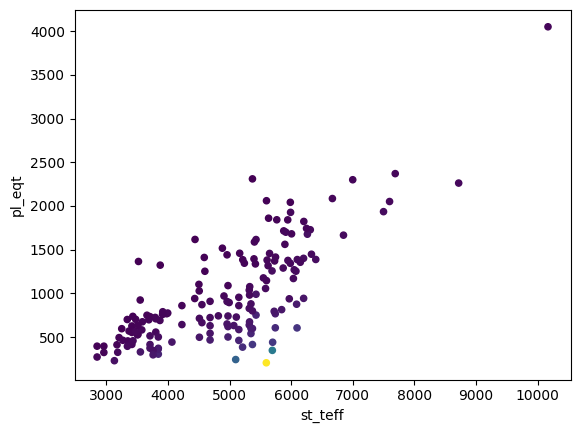

In [87]:
#(4050-206)/162

#tempytempyList = []
#Temp = 206
#for i in range(0, 162):
#    tempytempyList.append(Temp)
#    Temp += (4050-206)/162

graph = exoplanet_df.plot.scatter("st_teff", "pl_eqt", color = list(exoplanet_df["pl_orbsmax"]))

In [61]:
#fig = plt.figure()
 
# syntax for 3-D projection
#ax = plt.axes(projection ='3d')
 
# defining all 3 axis
#x = list(exoplanet_df["st_teff"])
#y = list(exoplanet_df["pl_orbsmax"])
#z = list(exoplanet_df["pl_eqt"])
 
# plotting
#ax.scatter(x, y, z, c = 'red')
#ax.set_title('Correlation between distance and temp')
#plt.show()

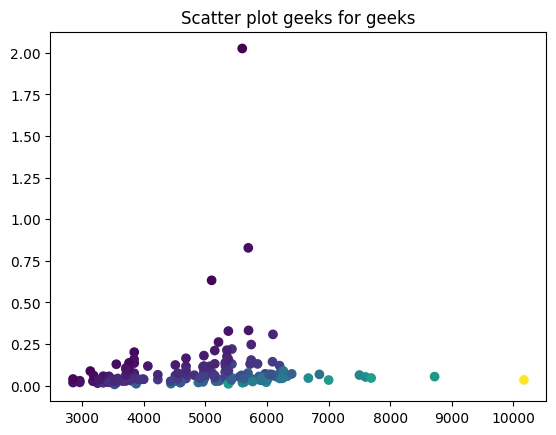

In [75]:
ax = plt.axes()
x = list(exoplanet_df["st_teff"])
y = list(exoplanet_df["pl_orbsmax"])

ax.scatter( x, y, c = list(exoplanet_df["pl_eqt"]) )
ax.set_title('Scatter plot geeks for geeks')
plt.show()
